**Home Assignment - PulseNMore_Rotem Stahl**

In the following home assignment I was asked to analyze data from a sample of 51 devices, using the specific libraries numpy, pandas, and matplotlib. No other libraries are allowed for this analysis.

The dataset contains 5 dependent variables Y1 ... Y5 and 4 independent variables X2 ... X5, such that the variable Yi corresponds to Xi, except for Y1 which has no X variable.

In [103]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# **Part 1 - Data Loading and Description**

Load the data from 'factory_test.csv' and provide a description of its contents


In [104]:
rawdata = pd.read_csv('factory_test_data.csv')
new_devices = pd.read_csv('new_devices.csv')

In [105]:
rawdata.describe()

# Replace empty lists with NaN (modifies 'rawdata' in place)
rawdata.replace('[]', np.nan, inplace=True)

# Convert all applicable columns to numeric data type
data = rawdata.apply(pd.to_numeric)

data.describe()

,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5
count,51.000000,47.0,47.000000,47.0,47.000000,47.0,47.000000,47.0,47.000000
mean,1504.960784,18.0,17.425957,14.0,13.452340,12.0,11.673830,9.0,8.346383
std,71.384861,0.0,4.275727,0.0,0.123732,0.0,1.226748,0.0,0.295807
min,1487.000000,18.0,7.870000,14.0,13.190000,12.0,9.100000,9.0,7.810000
25%,1493.000000,18.0,14.825000,14.0,13.395000,12.0,10.965000,9.0,8.195000
50%,1495.000000,18.0,18.000000,14.0,13.450000,12.0,11.500000,9.0,8.330000
75%,1497.000000,18.0,20.250000,14.0,13.520000,12.0,12.355000,9.0,8.555000
max,2004.000000,18.0,25.260000,14.0,13.990000,12.0,14.560000,9.0,9.160000


# Looking at the information about the raw data i notices some data points contain [] instsad of NaN, and X values were not numeric values. in ordar to use the data I did basic manipulation - changing [] to NaN and changing the data to be a numeric value.

# **2. Data Visualization and Explanation**

Visualize the data and explain the observed patterns or trends.

In [108]:
def basic_data_plot(data,title):
  fig, ax = plt.subplots(2, 2)

  ax[0, 0].scatter(data.X2, data.Y2 )
  ax[0, 0].set_xlabel('X2')
  ax[0, 0].set_ylabel('Y2')
  tl1=('Y2 mean={}, Y2 STD={}, Y2 median={}'.format(round(data.Y2.mean(),4) , round(data.Y2.std(),4), round(data.Y2.median(),4)))
  ax[0, 0].set_title(tl1,fontsize=7)


  ax[0, 1].scatter(data.X3, data.Y3)
  ax[0, 1].set_xlabel('X3')
  ax[0, 1].set_ylabel('Y3')
  tl2=('Y3 mean={}, Y3 STD={}, Y3 median={}'.format(round(data.Y3.mean(),4) , round(data.Y3.std(),4), round(data.Y3.median(),4)))
  ax[0, 1].set_title(tl2,fontsize=7)

  ax[1, 0].scatter(data.X4, data.Y4)
  ax[1, 0].set_xlabel('X4')
  ax[1, 0].set_ylabel('Y4')
  tl3=('Y4 mean={}, Y4 STD={}, Y4 median={}'.format(round(data.Y4.mean(),4) , round(data.Y4.std(),4), round(data.Y4.median(),4)))
  ax[1, 0].set_title(tl3,fontsize=7)

  ax[1, 1].scatter(data.X5, data.Y5)
  ax[1, 1].set_xlabel('X5')
  ax[1, 1].set_ylabel('Y5')
  tl4=('Y5 mean={}, Y5 STD={}, Y5 median={}'.format(round(data.Y5.mean(),4) , round(data.Y5.std(),4), round(data.Y5.median(),4)))
  ax[1, 1].set_title(tl4,fontsize=7)

  fig.subplots_adjust(bottom=0.2, right=1.5, top=0.9, wspace=0.4, hspace=0.4)
  plt.suptitle(title)
  plt.tight_layout()
  plt.show()

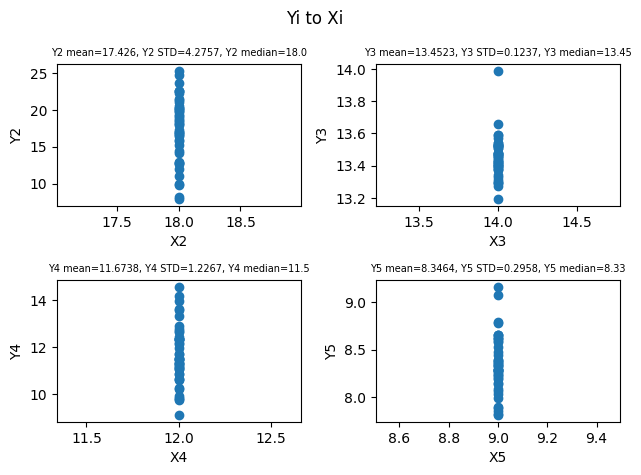

In [109]:
basic_data_plot(data,'Yi to Xi')

#First impression
Looking at my initial data visualization - we can see that Yi changes but Xi is the same for all samples.

looking at our data we see that Yi mean and median are close to the value of Xi for all i, but the destribution around it changes. This might indicate that Xi is a goal value of a measurement.

I note that Y2 is distributed roughly even around X2, and Y4 and X4 are the same.

Y3 is always smaller than X3, and besides one point it is even smaller by one magnitude of it.

Y5 mostly distributed smaller than X5, with a small set of points that hit bigger than X5. They might be considre as outliers.

In [110]:

# Find rows with missing values
missing_rows = data[data.isnull().any(axis=1)]

# Remove rows with missing values
data = data.dropna()

# now we have smaller counck of data, with no NaNs



Y1 being an independent variable without a corresponding X might indicate it changes according to all X's, knowing our X might be goals or environment data- let's check the connection between Y1 and Yi.
#I will be plotting Y1(Yi) and checking to see for trends and patterns

In [114]:
def plot_4_Y1_Yi(data,title):
  fig, ax = plt.subplots(2, 2)

  ax[0, 0].scatter(data.Y2, data.Y1 )
  ax[0, 0].set_xlabel('Y2 (X2={})'.format(data.X2[0]))
  ax[0, 0].set_ylabel('Y1')
  tl1=('Y2 mean={}, Y2 STD={}, Y2 median={}'.format(round(data.Y2.mean(),4) , round(data.Y2.std(),4), round(data.Y2.median(),4)))
  ax[0, 0].set_title(tl1,fontsize=7)


  ax[0, 1].scatter(data.Y3, data.Y1)
  ax[0, 1].set_xlabel('Y3 (X3={})'.format(data.X3[0]))
  ax[0, 1].set_ylabel('Y1')
  tl2=('Y3 mean={}, Y3 STD={}, Y3 median={}'.format(round(data.Y3.mean(),4) , round(data.Y3.std(),4), round(data.Y3.median(),4)))
  ax[0, 1].set_title(tl2,fontsize=7)

  ax[1, 0].scatter(data.Y4, data.Y1)
  ax[1, 0].set_xlabel('Y4 (X4={})'.format(data.X4[0]))
  ax[1, 0].set_ylabel('Y1')
  tl3=('Y4 mean={}, Y4 STD={}, Y4 median={}'.format(round(data.Y4.mean(),4) , round(data.Y4.std(),4), round(data.Y4.median(),4)))
  ax[1, 0].set_title(tl3,fontsize=7)

  ax[1, 1].scatter(data.Y5, data.Y1)
  ax[1, 1].set_xlabel('Y5 (X5={})'.format(data.X5[0]))
  ax[1, 1].set_ylabel('Y1')
  tl4=('Y5 mean={}, Y5 STD={}, Y5 median={}'.format(round(data.Y5.mean(),4) , round(data.Y5.std(),4), round(data.Y5.median(),4)))
  ax[1, 1].set_title(tl4,fontsize=7)

  fig.subplots_adjust(bottom=0.2, right=1.5, top=0.9, wspace=0.4, hspace=0.4)
  plt.suptitle(title)
  plt.tight_layout()
  plt.show()


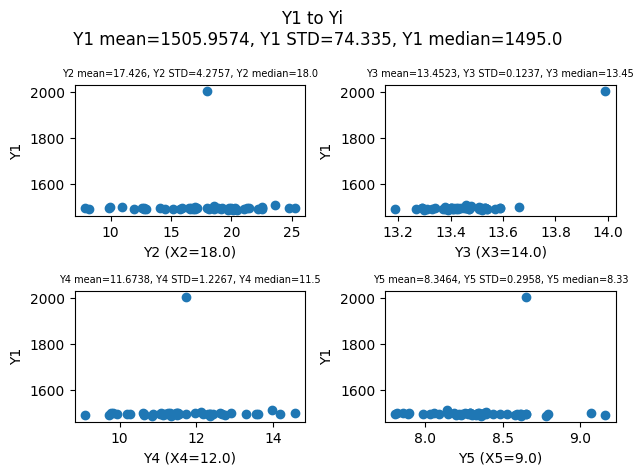

In [115]:
title = ('Y1 to Yi \n Y1 mean={}, Y1 STD={}, Y1 median={}'.format(round(data.Y1.mean(),4) , round(data.Y1.std(),4), round(data.Y1.median(),4)))
plot_4_Y1_Yi(data,title)

# **we can see we have one Y1 value being an obvious ourlier, let's remove it and look again at our data.**

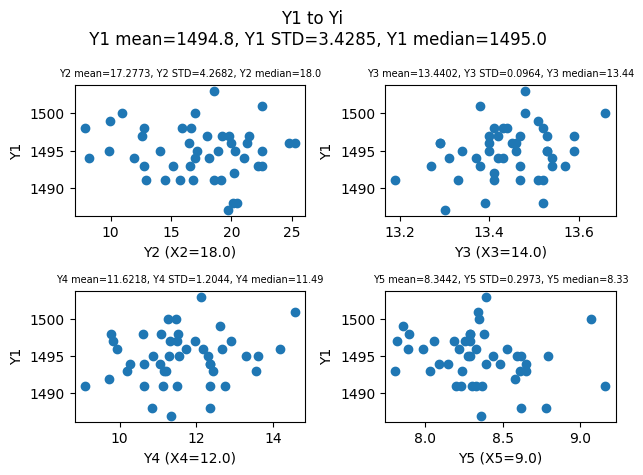

In [117]:
# Identify the outlier value
outlier_value = max(data.Y1)

# remove the outlier
data = data[data['Y1'] != outlier_value]

# new plot without the outlier
title = ('Y1 to Yi \n Y1 mean={}, Y1 STD={}, Y1 median={}'.format(round(data.Y1.mean(),4) , round(data.Y1.std(),4), round(data.Y1.median(),4)))
plot_4_Y1_Yi(data,title)

we can see our Y1 STD is a lot smaller now, while the rest of the statistics are almost the same, and our data looks a lot better - we can start looking for trends and patterns, Let look at the way the data goes around the X value with a histogram and look for the CI

In [155]:
def make_CI(data,conf):
  ci_1 = np.percentile(data.Y1, [100*(1-conf)/2,100*(1-(1-conf)/2)])
  ci_2 = np.percentile(data.Y2, [100*(1-conf)/2,100*(1-(1-conf)/2)])
  ci_3 = np.percentile(data.Y3, [100*(1-conf)/2,100*(1-(1-conf)/2)])
  ci_4 = np.percentile(data.Y4, [100*(1-conf)/2,100*(1-(1-conf)/2)])
  ci_5 = np.percentile(data.Y5, [100*(1-conf)/2,100*(1-(1-conf)/2)])

  return ci_1,ci_2,ci_3,ci_4,ci_5

In [156]:
def plot_5_hist(data,title):

  #finding the CI
  conf = 0.95
  ci95_1,ci95_2,ci95_3,ci95_4,ci95_5=make_CI(data,conf)
  fig, (ax1, ax2, ax3, ax4,ax5) = plt.subplots(nrows=5, ncols=1, figsize=(10, 8))

  ax1.hist(data.Y1,  alpha=0.5, color='blue', density=True)
  ax1.axvline(data.Y1.mean(), color='red', linestyle='dashed', linewidth=2)
  ax1.axvline(ci95_1[0], color='black', linestyle='solid', linewidth=1.5)
  ax1.axvline(ci95_1[1], color='black', linestyle='solid', linewidth=1.5)
  ax1.set_xlabel('Y1')
  ax1.set_ylabel('Density')
  ax1.set_title('Y1 histogram')
  leg=['Y1 mean','CI','CI','Y1 data']
  ax1.legend(leg, loc='best', bbox_to_anchor=(1.2, 1))

  ax2.hist(data.Y2, alpha=0.5, color='green', density=True)
  ax2.axvline(data.Y2.mean(), color='red', linestyle='dashed', linewidth=2)
  ax2.axvline(data.X2[0], color='lime', linestyle='dashed', linewidth=1.5)
  ax2.axvline(ci95_2[0], color='black', linestyle='solid', linewidth=1.5)
  ax2.axvline(ci95_2[1], color='black', linestyle='solid', linewidth=1.5)
  ax2.set_xlabel('Y2')
  ax2.set_ylabel('Density')
  ax2.set_title('Y2 histogram')
  leg=['Y2 mean','X2=18','CI','CI','Y2 data']
  ax2.legend(leg, loc='best', bbox_to_anchor=(1.2, 1))


  ax3.hist(data.Y3,  alpha=0.5, color='orange', density=True)
  ax3.axvline(data.Y3.mean(), color='red', linestyle='dashed', linewidth=2)
  ax3.axvline(data.X3[0], color='lime', linestyle='dashed', linewidth=1.5)
  ax3.axvline(ci95_3[0], color='black', linestyle='solid', linewidth=1.5)
  ax3.axvline(ci95_3[1], color='black', linestyle='solid', linewidth=1.5)
  ax3.set_xlabel('Y3')
  ax3.set_ylabel('Density')
  ax3.set_title('Y3 histogram')
  leg=['Y3 mean','X3=14','CI','CI','Y3 data']
  ax3.legend(leg, loc='best', bbox_to_anchor=(1.2, 1))


  ax4.hist(data.Y4,  alpha=0.5, color='purple', density=True)
  ax4.axvline(data.Y4.mean(), color='red', linestyle='dashed', linewidth=2)
  ax4.axvline(data.X4[0], color='lime', linestyle='dashed', linewidth=1.5)
  ax4.axvline(ci95_4[0], color='black', linestyle='solid', linewidth=1.5)
  ax4.axvline(ci95_4[1], color='black', linestyle='solid', linewidth=1.5)
  ax4.set_xlabel('Y4')
  ax4.set_ylabel('Density')
  ax4.set_title('Y4 histogram')
  leg=['Y4 mean','X4=12','CI','CI','Y4 data']
  ax4.legend(leg, loc='best', bbox_to_anchor=(1.2, 1))


  ax5.hist(data.Y5,  alpha=0.5, color='teal', density=True)
  ax5.axvline(data.Y5.mean(), color='red', linestyle='dashed', linewidth=2)
  ax5.axvline(data.X5[0], color='lime', linestyle='dashed', linewidth=1.5)
  ax5.axvline(ci95_5[0], color='black', linestyle='solid', linewidth=1.5)
  ax5.axvline(ci95_5[1], color='black', linestyle='solid', linewidth=1.5)
  ax5.set_xlabel('Y5')
  ax5.set_ylabel('Density')
  ax5.set_title('Y5 histogram')
  leg=['Y5 mean','X5=9','CI','CI','Y5 data']
  ax5.legend(leg, loc='best', bbox_to_anchor=(1.2, 1))

  plt.suptitle(title)
  plt.tight_layout()
  plt.show()


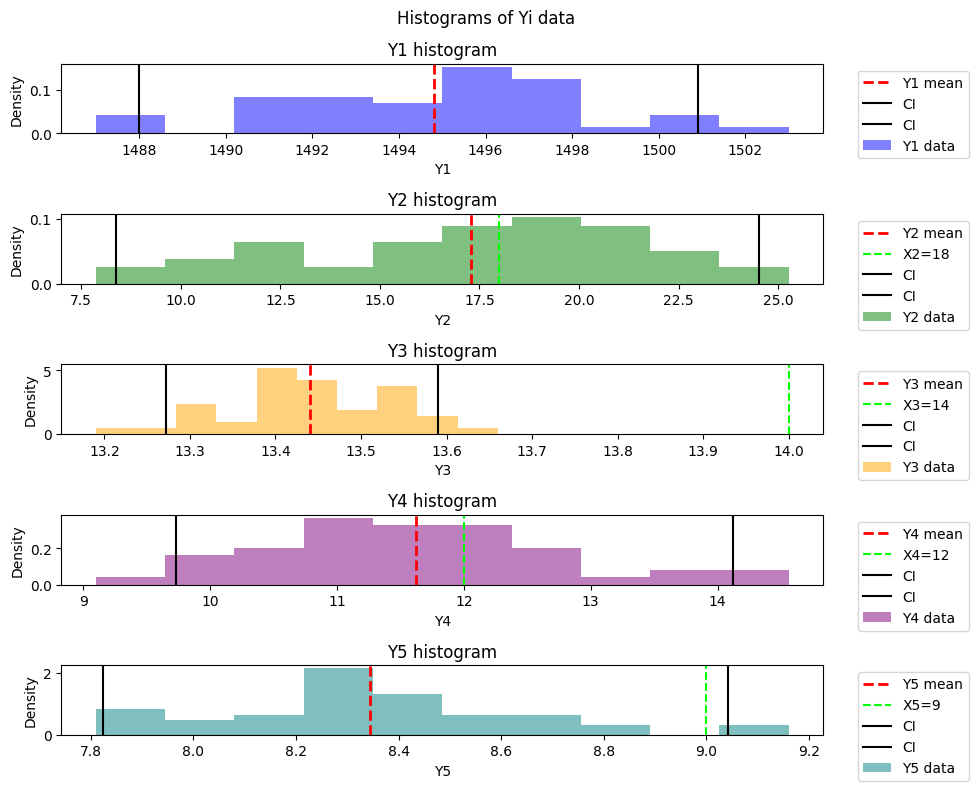

In [119]:
plot_5_hist(data,'Histograms of Yi data')

**looking at the histograms data we can see a that it seems to destribute normaly, lets plot normal destributions with our data**

In [120]:
def find_norm(data):
  #finding normal destribution
  ymean=data.mean()
  ystd=data.std()
  x = np.linspace(ymean - 3 * ystd, ymean + 3 * ystd, 100)
  y = (1 / (ystd * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - ymean) / ystd) ** 2)
  return x,y


In [157]:
def plot_5_norm(data,title):

  #finding the CI
  conf = 0.95
  ci95_1,ci95_2,ci95_3,ci95_4,ci95_5=make_CI(data,conf)

  #finding normal destribution
  x1,y1=find_norm(data.Y1)
  x2,y2=find_norm(data.Y2)
  x3,y3=find_norm(data.Y3)
  x4,y4=find_norm(data.Y4)
  x5,y5=find_norm(data.Y5)


  fig, (ax1, ax2, ax3, ax4,ax5) = plt.subplots(nrows=5, ncols=1, figsize=(10, 8))

  ax1.plot(x1, y1, color='blue')
  ax1.axvline(data.Y1.mean(), color='red', linestyle='dashed', linewidth=2)
  ax1.axvline(ci95_1[0], color='black', linestyle='solid', linewidth=1.5)
  ax1.axvline(ci95_1[1], color='black', linestyle='solid', linewidth=1.5)
  ax1.set_xlabel('Y1')
  ax1.set_ylabel('Density')
  ax1.set_title('Y1 normal distribution ')
  leg=['Y1 distribution ','mean' ,'CI','CI']
  ax1.legend(leg, loc='best', bbox_to_anchor=(1.2, 1))

  ax2.plot(x2, y2, color='blue')
  ax2.axvline(data.Y2.mean(), color='red', linestyle='dashed', linewidth=2)
  ax2.axvline(data.X2[0], color='lime', linestyle='dashed', linewidth=1.5)
  ax2.axvline(ci95_2[0], color='black', linestyle='solid', linewidth=1.5)
  ax2.axvline(ci95_2[1], color='black', linestyle='solid', linewidth=1.5)
  ax2.set_xlabel('Y2')
  ax2.set_ylabel('Density')
  ax2.set_title('Y2 normal distribution ')
  leg=['Y2 distribution ','mean','X2=18','CI','CI']
  ax2.legend(leg, loc='best', bbox_to_anchor=(1.2, 1))


  ax3.plot(x3, y3, color='blue')
  ax3.axvline(data.Y3.mean(), color='red', linestyle='dashed', linewidth=2)
  ax3.axvline(data.X3[0], color='lime', linestyle='dashed', linewidth=1.5)
  ax3.axvline(ci95_3[0], color='black', linestyle='solid', linewidth=1.5)
  ax3.axvline(ci95_3[1], color='black', linestyle='solid', linewidth=1.5)
  ax3.set_xlabel('Y3')
  ax3.set_ylabel('Density')
  ax3.set_title('Y3 normal distribution ')
  leg=['Y3 distribution ','mean','X3=14','CI','CI']
  ax3.legend(leg, loc='best', bbox_to_anchor=(1.2, 1))


  ax4.plot(x4, y4, color='blue')
  ax4.axvline(data.Y4.mean(), color='red', linestyle='dashed', linewidth=2)
  ax4.axvline(data.X4[0], color='lime', linestyle='dashed', linewidth=1.5)
  ax4.axvline(ci95_4[0], color='black', linestyle='solid', linewidth=1.5)
  ax4.axvline(ci95_4[1], color='black', linestyle='solid', linewidth=1.5)
  ax4.set_xlabel('Y4')
  ax4.set_ylabel('Density')
  ax4.set_title('Y4 normal distribution ')
  leg=['Y4 distribution ','mean','X4=12','CI','CI']
  ax4.legend(leg, loc='best', bbox_to_anchor=(1.2, 1))


  ax5.plot(x5, y5, color='blue')
  ax5.axvline(data.Y5.mean(), color='red', linestyle='dashed', linewidth=2)
  ax5.axvline(data.X5[0], color='lime', linestyle='dashed', linewidth=1.5)
  ax5.axvline(ci95_5[0], color='black', linestyle='solid', linewidth=1.5)
  ax5.axvline(ci95_5[1], color='black', linestyle='solid', linewidth=1.5)
  ax5.set_xlabel('Y5')
  ax5.set_ylabel('Density')
  ax5.set_title('Y5 normal distribution ')
  leg=['Y5 distribution ','mean','X5=9','CI','CI']
  ax5.legend(leg, loc='best', bbox_to_anchor=(1.2, 1))

  plt.suptitle(title)
  plt.tight_layout()
  plt.show()


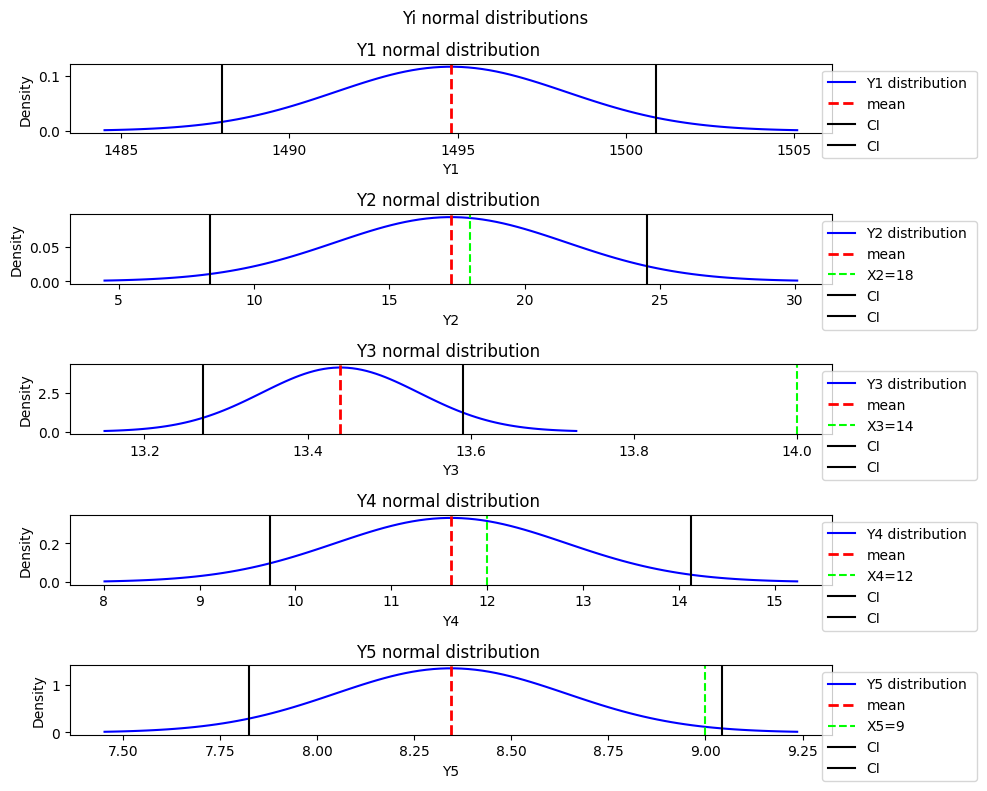

In [122]:
plot_5_norm(data,'Yi normal distributions')

looking at our histograms and normal destributions we can see that most of our data **does appear to behave normally.**

**for Y2 and Y4** - it seems that the mean of the data and the Xi value are close, this might indicate that our pupulation destributs normaly around the Xi value, and because the sample contains only 51 devices (and only 46 data samples that are workable) we have this difference.

**Looking at Y3** we see that the X3 value is not inside the CI and that no data points reach the X3 value, This might show that Y3(X3) is a max value not to reach, for example, temperature of failure.

**Looking at Y5** the X5 value is inside the CI but very close to the right side CI, This might show similarly to Y3(X3) that the X3 data is some kind of upper bound for the data, but an accptable outcome.

**looking at the CI will allow us to later determine wheater the new devices belong inside our sample or not.**


# To understand Y1 that does not have a x value, let's check if there is a connection between Y1 and Yi using linear regression

In [124]:
def linreg(x,y):
  # calculate using formulas
  b1 = np.dot((x-x.mean()),(y-y.mean()))/ np.dot((x-x.mean()),(x-x.mean()))
  b0 = y.mean()-b1*x.mean()

  y_hat = b0+b1*x
  # effect size for regression model

  SSreg = np.dot((y_hat-y.mean()),(y_hat-y.mean()))
  SSres = np.dot((y-y_hat),(y-y_hat))
  SStot = np.dot((y-y.mean()),(y-y.mean()))

  R2 = SSreg/SStot

  f2 = SSreg/SSres

  return  b0,b1,R2, f2, y_hat


In [170]:
def plot_4_reg(data,title):

  fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, figsize=(10, 8))

  b0,b1,R2,f2,yhat2 = linreg(data.Y2,data.Y1) #fitting the regression
  ax1.scatter(data.Y2,data.Y1)
  ax1.plot(data.Y2,yhat2, color = 'lime')
  ax1.set_xlabel('Y2')
  ax1.set_ylabel('Y1')
  ax1.set_title('Y1= {}+{}*(Y2) \n R2={}, f2={}'.format(round(b0,3),round(b1,3),round(R2,4),round(f2,4)))
  leg=['data points','regression']
  ax1.legend(leg, loc='best', bbox_to_anchor=(1.2, 1))

  b0,b1,R2,f2,yhat3 = linreg(data.Y3,data.Y1)#fitting the regression
  ax2.scatter(data.Y3,data.Y1)
  ax2.plot(data.Y3,yhat3, color = 'lime')
  ax2.set_xlabel('Y3')
  ax2.set_ylabel('Y1')
  ax2.set_title('Y1= {}+{}*(Y3) \n R2={}, f2={}'.format(round(b0,3),round(b1,3),round(R2,4),round(f2,4)))
  leg=['data points','regression']
  ax2.legend(leg, loc='best', bbox_to_anchor=(1.2, 1))

  b0,b1,R2,f2,yhat4 = linreg(data.Y4,data.Y1)#fitting the regression
  ax3.scatter(data.Y4,data.Y1)
  ax3.plot(data.Y4,yhat4, color = 'lime')
  ax3.set_xlabel('Y4')
  ax3.set_ylabel('Y1')
  ax3.set_title('Y1= {}+{}*(Y4) \n R2={}, f2={}'.format(round(b0,3),round(b1,3),round(R2,4),round(f2,4)))
  leg=['data points','regression']
  ax3.legend(leg, loc='best', bbox_to_anchor=(1.2, 1))


  b0,b1,R2,f2,yhat5 = linreg(data.Y5,data.Y1)#fitting the regression
  ax4.scatter(data.Y5,data.Y1)
  ax4.plot(data.Y5,yhat5, color = 'lime')
  ax4.set_xlabel('Y5')
  ax4.set_ylabel('Y1')
  ax4.set_title('Y1= {}+{}*(Y5) \n R2={}, f2={}'.format(round(b0,3),round(b1,3),round(R2,4),round(f2,4)))
  leg=['data points','regression']
  ax4.legend(leg, loc='best', bbox_to_anchor=(1.2, 1))

  plt.suptitle(title)
  plt.tight_layout()
  plt.show()


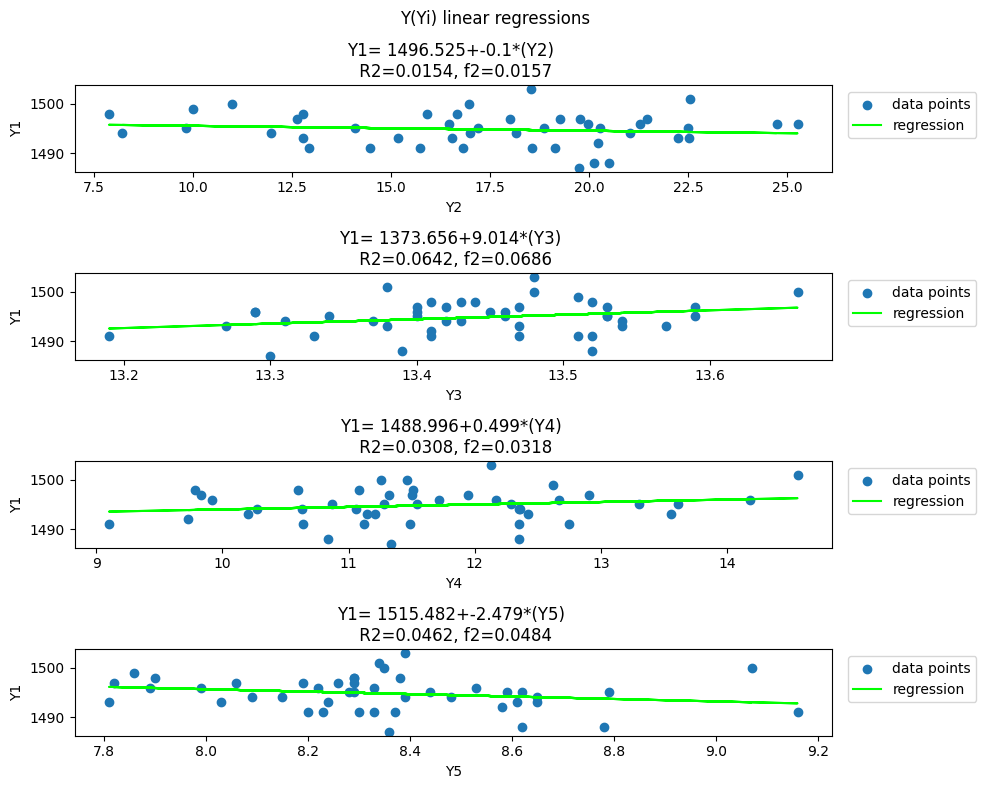

In [171]:
plot_4_reg(data,'Y(Yi) linear regressions')


Looking at our linear regressions Y1(Yi) we can see that they are not a very good representation of the data. **R2 is very low and f2 is also not significant.**
I will try to analays the data using linear multivariate regression

In [129]:
def multivariateReg(data):
  # try linear multivariate rgression

  y = data.Y1

  X = np.array([np.ones(len(data.Y1)), data.Y2, data.Y3,data.Y4,data.Y5])
  X = X.T

  b = np.linalg.inv(X.T@X)@X.T@y

  y_hat = np.dot(X,b)

  Syx2 = (y-y_hat).T@(y-y_hat)/(len(y)-5)

  print('b0 = {} , b1 = {} , b2 = {}, b3 = {}, b4= {}, Syx2 = {}'.format(round(b[0],4),round(b[1],4),round(b[2],4),round(b[3],4),round(b[4],4),round(Syx2,4)))

  SSreg = np.dot((y_hat-y.mean()),(y_hat-y.mean()))
  vreg = 5-1
  MSreg = SSreg/vreg

  SSres = np.dot((y_hat-y),(y_hat-y))
  vres = len(y)-5
  MSres = SSres/vres

  R2 = SSreg/(SSreg+SSres)
  print('R2 = {} '.format(round(R2,4)))


In [130]:
multivariateReg(data)

b0 = 1408.088 , b1 = -0.0727 , b2 = 7.5534, b3 = 0.4362, b4= -2.2315, Syx2 = 11.2038
R2 = 0.1335 


The multivariante regression did not give more significant results, R2 is still very low and it does not indicate that our data varies around those variables.

# **conclusion about our patterns and trends:**
we can see our data behaves similarly to a normal distribution - with Y2 and Y4 mean close to the X2 and X4 values.
for Y3 we see that the X value is outside the CI, indicating it is a sort of "stop value".
for Y5 we see that the X value is within the CI, but at close to the right side. that might indicate a "stop value", but one less strick than the Y3 value.
overall, we can consider our sample as representing the population and use its data, especially the CI, to find whether the new devices (part 4) came from the same population as the sample or not.

# **3. Data Preprocessing**
Perform any necessary preprocessing on the data:

the necessary preprocessing done on the data was:
1.   Change data to numeric values, Xi was not numeric.
2.   Change '[]' to NaN and later erase rows containing NaN. this made our data shorter and contained 47 valid data points out of the 51.
3. Remove one obvious outlier, one data point contained Y1 value about 500 units bigger than the rest of the data, and removing it allowed for a better view of the data.

# **4. Data Exploration**
You have also received another file called ‘new_devices.csv’ containing data for 3 additional devices. Please rank these new devices based on their probability of belonging to the sample group

**I am going to do that based on if they fall within the CI of our Yi data, for each one they fall within they will receive 1 point, 5 points being fits in our sample.**
otherwise, I will claim the new measurmant came from outside my sample.

In [131]:
new_devices = new_devices.apply(pd.to_numeric)

new_devices.head()

,ID,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5
0,1,1557,18,16.15,14,13.55,12,11.28,9,8.33
1,2,1497,18,18.31,14,13.44,12,11.65,9,8.34
2,3,1495,18,17.48,14,13.39,12,11.52,9,8.03


In [158]:
def check_inside(data,check):
  # finding the CI of all
  alpha = 0.05/5 # handling multipule compersion
  conf = 1 - alpha
  ci_1,ci_2,ci_3,ci_4,ci_5=make_CI(data,conf)

  ci_all=[ci_1,ci_2,ci_3,ci_4,ci_5]
  score=0
  test=np.zeros(len(ci_all))
  if np.logical_and(check.Y1 > ci_all[0][0], check.Y1 < ci_all[0][1]):
    score=score+1
    test[0]=1
  if np.logical_and(check.Y2 > ci_all[1][0], check.Y2 < ci_all[1][1]):
    score=score+1
    test[1]=1
  if np.logical_and(check.Y3 > ci_all[2][0], check.Y3 < ci_all[2][1]):
    score=score+1
    test[2]=1
  if np.logical_and(check.Y4 > ci_all[3][0], check.Y4 < ci_all[3][1]):
    score=score+1
    test[3]=1
  if np.logical_and(check.Y5 > ci_all[4][0], check.Y5 < ci_all[0][1]):
    score=score+1
    test[4]=1

  return score, test

In [159]:
scores = []
tests=[]
for index, row in new_devices.iterrows():
    score,test = check_inside(data, row)
    scores.append(score)
    tests.append(test)
new_devices['Scores'] = scores

# the updated new devices
print(new_devices)


   ID    Y1  X2     Y2  X3     Y3  X4     Y4  X5    Y5  Scores
0   1  1557  18  16.15  14  13.55  12  11.28   9  8.33       4
1   2  1497  18  18.31  14  13.44  12  11.65   9  8.34       5
2   3  1495  18  17.48  14  13.39  12  11.52   9  8.03       5


we can see that **device 1 is not a perfect fit for our sample, resulting in a score of 4/5.**
I will now check to see in what parameter it failed and how far was the data from the CI

**the other devices received a score of 5 - meaning they fit perfectly within our data.**


In [135]:
score,test=check_inside(data,new_devices.iloc[0])
print(test)

[0. 1. 1. 1. 1.]


In [160]:
def plot_new_data_in(data,new,title):
  #finding the CI
  conf = 0.95
  ci95_1,ci95_2,ci95_3,ci95_4,ci95_5=make_CI(data,conf)

  fig, (ax1, ax2, ax3, ax4,ax5) = plt.subplots(nrows=5, ncols=1, figsize=(10, 8))

  ax1.hist(data.Y1,  alpha=0.5, color='blue', density=True)
  ax1.axvline(data.Y1.mean(), color='red', linestyle='dashed', linewidth=2)
  ax1.axvline(ci95_1[0], color='black', linestyle='solid', linewidth=1.5)
  ax1.axvline(ci95_1[1], color='black', linestyle='solid', linewidth=1.5)
  ax1.axvline(x=new.Y1, color='green', linestyle='solid', linewidth=1.5)
  ax1.set_xlabel('Y1')
  ax1.set_ylabel('Density')
  ax1.set_title('Y1 histogram')
  leg=['Y1 mean','CI','CI','new data','Y1 data']
  ax1.legend(leg, loc='best', bbox_to_anchor=(1.2, 1))

  ax2.hist(data.Y2, alpha=0.5, color='green', density=True)
  ax2.axvline(data.Y2.mean(), color='red', linestyle='dashed', linewidth=2)
  ax2.axvline(data.X2[0], color='lime', linestyle='dashed', linewidth=1.5)
  ax2.axvline(ci95_2[0], color='black', linestyle='solid', linewidth=1.5)
  ax2.axvline(ci95_2[1], color='black', linestyle='solid', linewidth=1.5)
  ax2.axvline(x=new.Y2, color='green', linestyle='solid', linewidth=1.5)
  ax2.set_xlabel('Y2')
  ax2.set_ylabel('Density')
  ax2.set_title('Y2 histogram')
  leg=['Y2 mean','X2=18','CI','CI','new data','Y2 data']
  ax2.legend(leg, loc='best', bbox_to_anchor=(1.2, 1))


  ax3.hist(data.Y3,  alpha=0.5, color='orange', density=True)
  ax3.axvline(data.Y3.mean(), color='red', linestyle='dashed', linewidth=2)
  ax3.axvline(data.X3[0], color='lime', linestyle='dashed', linewidth=1.5)
  ax3.axvline(ci95_3[0], color='black', linestyle='solid', linewidth=1.5)
  ax3.axvline(ci95_3[1], color='black', linestyle='solid', linewidth=1.5)
  ax3.axvline(x=new.Y3, color='green', linestyle='solid', linewidth=1.5)
  ax3.set_xlabel('Y3')
  ax3.set_ylabel('Density')
  ax3.set_title('Y3 histogram')
  leg=['Y3 mean','X3=14','CI','CI','new data','Y3 data']
  ax3.legend(leg, loc='best', bbox_to_anchor=(1.2, 1))


  ax4.hist(data.Y4,  alpha=0.5, color='purple', density=True)
  ax4.axvline(data.Y4.mean(), color='red', linestyle='dashed', linewidth=2)
  ax4.axvline(data.X4[0], color='lime', linestyle='dashed', linewidth=1.5)
  ax4.axvline(ci95_4[0], color='black', linestyle='solid', linewidth=1.5)
  ax4.axvline(ci95_4[1], color='black', linestyle='solid', linewidth=1.5)
  ax4.axvline(x=new.Y4, color='green', linestyle='solid', linewidth=1.5)
  ax4.set_xlabel('Y4')
  ax4.set_ylabel('Density')
  ax4.set_title('Y4 histogram')
  leg=['Y4 mean','X4=12','CI','CI','new data','Y4 data']
  ax4.legend(leg, loc='best', bbox_to_anchor=(1.2, 1))


  ax5.hist(data.Y5,  alpha=0.5, color='teal', density=True)
  ax5.axvline(data.Y5.mean(), color='red', linestyle='dashed', linewidth=2)
  ax5.axvline(data.X5[0], color='lime', linestyle='dashed', linewidth=1.5)
  ax5.axvline(ci95_5[0], color='black', linestyle='solid', linewidth=1.5)
  ax5.axvline(ci95_5[1], color='black', linestyle='solid', linewidth=1.5)
  ax5.axvline(x=new.Y5, color='green', linestyle='solid', linewidth=1.5)
  ax5.set_xlabel('Y5')
  ax5.set_ylabel('Density')
  ax5.set_title('Y5 histogram')
  leg=['Y5 mean','X5=9','CI','CI','new data','Y5 data']
  ax5.legend(leg, loc='best', bbox_to_anchor=(1.2, 1))

  plt.suptitle(title)
  plt.tight_layout()
  plt.show()


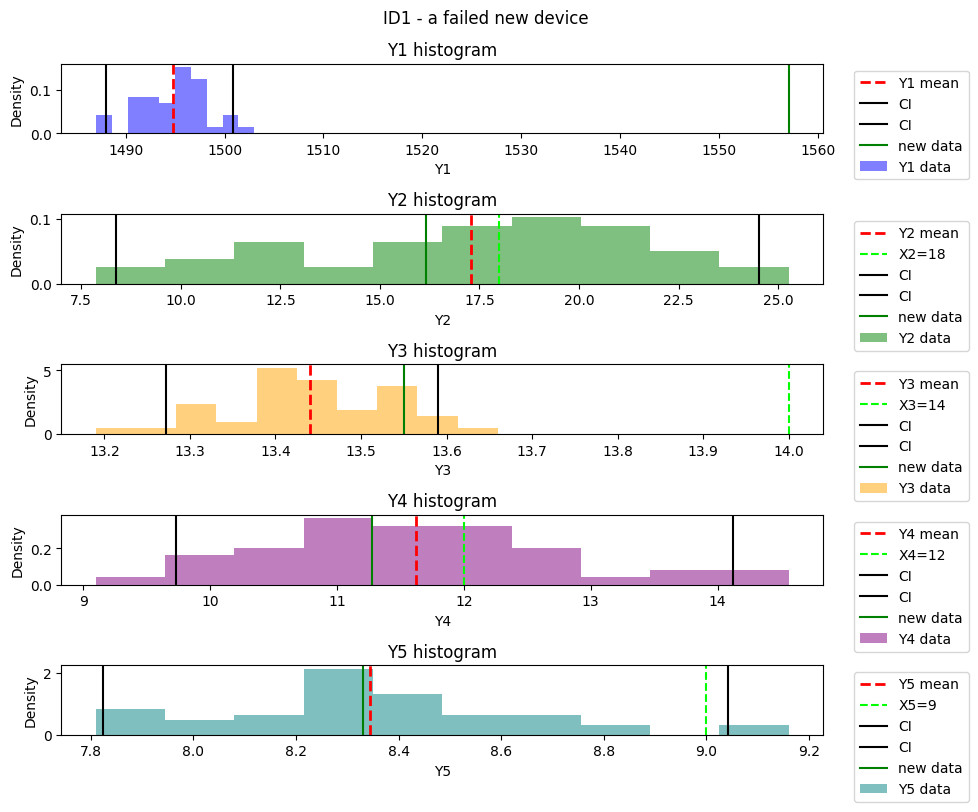

In [161]:
plot_new_data_in(data,new_devices.iloc[0],'ID1 - a failed new device')

# 5. Bonus
Suggest and implement a method for testing new devices based on your knowledge
of the sample group and specify which devices (sample group and new devices) fail your tests and why.

**I can use my scores to add scoring for all the data,assuming the CI will be the same for the population**

looking at my data and comparing it to the new devices we can see the original data does not have an ID of the devices.
using the same preprossesing we did at the beginning I can say some devices fail our tests - having NaN as data. let's collect them.

In [162]:
#addind ID to better know our devices
rawdata['ID'] = range(1, len(rawdata) + 1)
# Replace empty lists with NaN
rawdata.replace('[]', np.nan, inplace=True)
# Convert all applicable columns to numeric data type
data2 = rawdata.apply(pd.to_numeric)
# Find rows with missing values
failed_devices = data2[data2.isnull().any(axis=1)]
# Remove them
data2 = data2.dropna()

now using the scores I have set earlier, i will claim devices reciving a score below 4 failed, being outside the CI for 2 or more values.

In [163]:
scores = []
tests=[]
data_withscore=data2;
for index, row in data_withscore.iterrows():
    score,tests= check_inside(data2, row)
    scores.append(score)
data_withscore['Scores'] = scores

failed = data_withscore[data_withscore['Scores'] < 4]

complete_Fail = pd.concat([failed_devices, failed])

#addind the new devices that failed to the list
new_devices_F = new_devices[new_devices['Scores'] < 4]
complete_Fail = pd.concat([complete_Fail, new_devices_F])


print(complete_Fail)

      Y1    X2     Y2    X3     Y3    X4     Y4   X5    Y5  ID  Scores
1   1491   NaN    NaN   NaN    NaN   NaN    NaN  NaN   NaN   2     NaN
3   1493   NaN    NaN   NaN    NaN   NaN    NaN  NaN   NaN   4     NaN
7   1496   NaN    NaN   NaN    NaN   NaN    NaN  NaN   NaN   8     NaN
9   1493   NaN    NaN   NaN    NaN   NaN    NaN  NaN   NaN  10     NaN
2   2004  18.0  17.94  14.0  13.99  12.0  11.72  9.0  8.65   3     3.0
20  1491  18.0  18.55  14.0  13.19  12.0   9.10  9.0  8.30  21     3.0


we have a list of 7 devices from the old data set, and non from the new data set that have failed my test, being outside the CI for two or more values.